In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ticket_logs.csv')

In [3]:
data = data.rename(columns={'Кошки': 'Show_name','+88029264576': 'Tnumber'})

df_marks = pd.DataFrame(data)
new_row = {'Show_name':'Кошки', 'Tnumber':'88029264576'}
df_marks = df_marks.append(new_row, ignore_index=True)
data = df_marks

tnumbers = [] #номера телефонов
show_names = [] #наименование спектаклев

tnumbers = list(data['Tnumber'])
show_names = list(data['Show_name'])

C:\Users\skuan\AppData\Local\Temp\ipykernel_14260\4237856337.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_marks = df_marks.append(new_row, ignore_index=True)


In [4]:
import re
new_format_tnumbers = []

for i in range(len(tnumbers)):
    a = re.sub("[-|+|)|(]","",tnumbers[i])
    new_format_tnumbers.append(a)

data['Tnumber'] = new_format_tnumbers
data['Show_name'] = show_names

In [5]:
LET_TO_INT = {
    'a': 2, 'b': 2, 'c': 2, 'd': 3, 'e': 3, 'f': 3, 'g': 4, 'h': 4, 'i': 4, 'j': 5, 'k': 5, 'l': 5, 'm': 6, 'n': 6,
    'o': 6, 'p': 7, 'q': 7, 'r': 7, 's': 7, 't': 8, 'u': 8, 'v': 8, 'w': 9, 'x': 9, 'y': 9, 'z': 9,
}

tnumbers = list(data['Tnumber'])
f='';
massiv_nums =[]

for i in range(len(tnumbers)):
    numb = tnumbers[i]
    for index in range(len(numb)):
        p = numb[index]
        if p in  LET_TO_INT:
            f+= str(LET_TO_INT[p])
        else:
            f+= str(p)
    massiv_nums.append(f)
    f=""
data['Tnumber']=massiv_nums

In [6]:
shows = []
shows = list(data['Show_name'])
shows_unique = [] #список спектакли

In [7]:
for i in range(len(shows)):
    if shows[i] not in shows_unique:
        shows_unique.append(shows[i])

In [8]:
tnumbers=list(data['Tnumber'])
tnumber_unique=[]
count_unique_nums=[]
for i in range(len(shows_unique)):
    for index in range(len(shows)):
        if shows_unique[i]==shows[index] and tnumbers[index] not in tnumber_unique:
            tnumber_unique.append(tnumbers[index])
    count_unique_nums.append(len(tnumber_unique))
    tnumber_unique.clear()

In [9]:
import numpy as np
print('[Спектакль]|[Количество уникальных номеров]')
print(np.column_stack([shows_unique,count_unique_nums]))

[Спектакль]|[Количество уникальных номеров]
[['Норма' '157']
 ['Евгений Онегин' '160']
 ['Вестсайдская история' '89']
 ['Дон Кихот' '175']
 ['Лебединое озеро' '171']
 ['Спящая красавица' '175']
 ['Нотр-Дам де Пари' '88']
 ['Баядерка' '91']
 ['Жизель' '101']
 ['Свадьба Фигаро' '101']
 ['Щелкунчик' '84']
 ['Ромео и Джульетта' '90']
 ['Ночь перед Рождеством' '166']
 ['Ла-Ла Ленд' '167']
 ['Юнона и Авось' '107']
 ['Волшебная флейта' '87']
 ['Кошки' '180']
 ['Todd' '157']
 ['Севильский цирюльник' '157']
 ['Спартак' '158']
 ['Риголетто' '170']
 ['Кармен' '171']
 ['Травиата' '82']
 ['Чикаго' '92']
 ['Аида' '81']]


<AxesSubplot: >

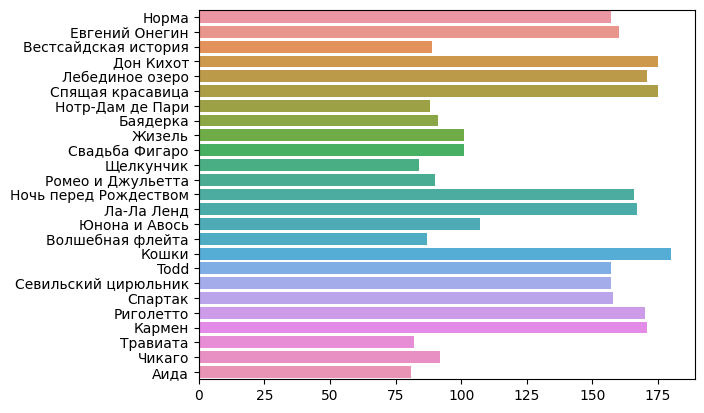

In [33]:
import seaborn as sb
sb.barplot(data,x=count_unique_nums,y=shows_unique,width=0.8)

In [11]:
index = count_unique_nums.index(max(count_unique_nums))
print('Спектакль с наибольшим числом уникальных телефонных номеров: '+ str(shows_unique[index]) +' = '+ str(max(count_unique_nums)) +' уникальных номеров')

Спектакль с наибольшим числом уникальных телефонных номеров: Кошки = 180 уникальных номеров
